
# Firearms Transactions in the U.S., 2001 - 2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleanup">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The FBI National Instant Criminal Background Check System (NICS) is used by licensed firearms dealers to identify criminal history or other disqualifying information in the record of any customer seeking to buy firearms. Its detailed compilation of types of checks performed, dates, and geographical locations of these checks provides a perspective of the market demand for guns as well as a view of the effectiveness of the criminal background check system.

For this exercise, I focused the analysis of the firearms data to fit an eight year period of political contrasts and several emotionally disturbing national events. The objective is to see what if any patterns in demand for guns emerge against that backdrop. 

The 16-year period of 2001 through 2016 covers the adminstrations of George W. Bush and Barack Obama. In September 2001 the nation suffered the devastating attack on the twin towers of New York City, and in December of 2012, we were shocked and saddened by the school shooting in Newtown, Connecticut.

The following questions are investigated:                                                                    
1) What are the trends in the data over the periods of each president's administration?                                         
2) Do the trends in the data reveal a pattern in the demand for guns around the times of the two emotionally disturbing national events?                                                                                
3) What are the trends in the data by state around the times of the two emotionally disturbing national events?


In [1]:
# The relevant packages for analysis and visulaization of the NICS data are imported here, including 
# the matplotlib "magic word".

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

### General Properties of the Raw Data

The NICS data were provided in the form of a Microsoft Excel spreadsheet. In any project scenario time and effort are always to be optimized and tools are chosen toward that end. In this case I took the opportunity to save time by doing some preliminary data wrangling in Excel. 

To start, I simply deleted the columns that were not relevant to my data analysis. I retained the following:
month, state, permit, handgun, long_gun. The analysis assumes that "permit" means firearms permits issued, "handgun" means handgun purchases requested, and "long_gun" means long gun (rifles) purchases requested.

On observation of the data it could be seen that the "month" column actually contained multiple values per cell, namely year and month, joined by a hyphen. This was reorganized in a few clicks in Excel that

>(1) created a new column in the data labeled "year"                                                                     
>(2) split every "year-month" character string in one cell into two values in two columns, "year"and "month"

Next I used Excel to search the data for blank cells. It turned out that all blank cells occurred where there should have
been numeric data,  for example, in the "permits" column. I replaced all such blanks with the number 0, recognizing
the risk of distorting the analysis, but also recognizing that zero is a logical substitute.

As it turned out, the blank cells  were heavily concentrated among the five United States territories of Guam, District of Columbia (legally a District, not a Territory), Mariana Islands, Puerto Rico, and Virgin Islands. The focus of this analysis is the 50 states. In the follwing "Data Cleaning" section I simply drop the Territories from the data.

Finally I exported the spreadsheet as a CSV named gun-data-cleaned.csv


In [2]:
# I imported a CSV file that was optimized for my work here.


gunDataCSV = pd.read_csv('gun-data-cleaned.csv')



<a id='cleanup'></a>
### Data Cleaning

Here I perform three steps to further refine the data set.



In [3]:
# First step: Save a list of the state names of interest in this analysis, for later use.
#
# Generate a list of states, sorted in alpha order, and delete the Territory names.

x = gunDataCSV['state'].unique()
stList = np.sort(x)

idx=np.where (stList=='District of Columbia')
stList = np.delete(stList,idx,0)

idx=np.where (stList=='Guam')
stList = np.delete(stList,idx,0)

idx=np.where (stList=='Mariana Islands')
stList = np.delete(stList,idx,0)

idx=np.where (stList=='Puerto Rico')
stList = np.delete(stList,idx,0)

idx=np.where (stList=='Virgin Islands')
stList = np.delete(stList,idx,0)


# Now delete the US Territories from the data set

gunData = gunDataCSV.set_index('state', inplace=False)
gunData.drop('District of Columbia', axis=0, inplace=True)
gunData.drop('Guam', axis=0, inplace=True)
gunData.drop('Mariana Islands', axis=0, inplace=True)
gunData.drop('Puerto Rico', axis=0, inplace=True)
gunData.drop('Virgin Islands', axis=0, inplace=True)

# Format numerical data as integers to facilitate operations

gunData['year'].astype(int)
gunData['month'].astype(int)
gunData['permit'].astype(int)
gunData['handgun'].astype(int)
gunData['long_gun'].astype(int)

# sort as a superficial check of time range

gunData.sort_values ('year', axis=0, ascending=True, inplace=True)

gunData.head(10)


,year,month,permit,handgun,long_gun
state,,,,,
South Carolina,1998,11,0,0,6
South Dakota,1998,12,0,252,2406
Illinois,1998,12,24022,6207,11032
New Jersey,1998,12,0,1130,2565
Massachusetts,1998,12,0,317,1077
North Dakota,1998,12,0,403,1958
Iowa,1998,12,7521,64,6572
Washington,1998,11,1,65,286
Minnesota,1998,12,1990,1078,8687


In [4]:
gunData.tail(10)

,year,month,permit,handgun,long_gun
state,,,,,
Tennessee,2017,6,16722,23369,11558
Idaho,2017,6,11559,3645,3698
Wyoming,2017,3,534,2017,2038
Kentucky,2017,8,376016,8039,6555
Nevada,2017,7,1805,3647,1962
Delaware,2017,4,689,2017,1249
South Dakota,2017,9,562,2020,4155
Nebraska,2017,1,4237,141,1673
Montana,2017,1,1859,2015,2748


<a id='eda'></a>
## Exploratory Data Analysis


### Nationwide Gun Permits Issued by Month, 2001-2016

<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x00000192084D9C88>>

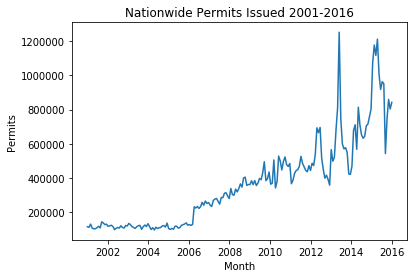

In [5]:
# The first analysis here is the trend of gun permits issued. The time period of interest is 2001 through 2016, corresponding
# to the administrations of George W. Bush and Barack Obama. 

# The nationwide total number of permits are calculated for each month of the 16 year period, resulting in 192 monthly totals. These
# These will be plotted on  a line graph.

# For each year in the sample period, extract the number of permits by state and by month, then sum up the state 
# contributions for each month. Create a dataframe with the results, and make the horizontal axis labels the first letter of 
# each month.


final = [] #initialize the final list

for yr in [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]:
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 1),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 2),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 3),['permit']]
    final = final +[sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 4),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 5),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 6),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 7),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 8),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 9),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 10),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 11),['permit']]
    final = final + [sample['permit'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 12),['permit']]
    final = final + [sample['permit'].sum()]

df1 = pd.DataFrame(data=final,index=['j','f','m','a','m','j','j','a','s','o','n','d',\
                                        'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d'],columns=['totalPermits'])

# At this point, save the dataframe back to a csv file for access in Excel. In particular the graphics functions
# of the spreadsheet will be very handy for visualization.

dfFinal = df1.transpose()
dfFinal.to_csv("gunPermits2001-2016.csv", index=False, encoding='utf8')

# Finally, plot the trend of gun permits over the 16 year period of interest using pyplot.

fig, ax = plt.subplots()
xindex = np.linspace(2001,2016,192,endpoint=True) # scale the x-axis to 192 points, representing months
ax.plot(xindex,final)

ax.set(xlabel='Month', ylabel='Permits',
       title='Nationwide Permits Issued 2001-2016')
ax.grid



<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x0000019208431470>>

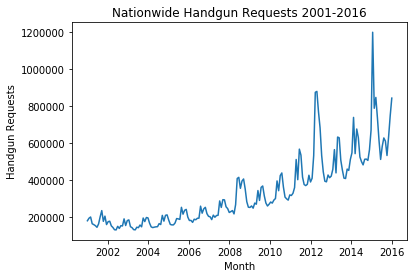

In [6]:
# Perform the same trend analysis this time examining the trend in handgun requests.


final = [] #initialize the final list

for yr in [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]:
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 1),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 2),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 3),['handgun']]
    final = final +[sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 4),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 5),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 6),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 7),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 8),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 9),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 10),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 11),['handgun']]
    final = final + [sample['handgun'].sum()]
    sample = gunData.loc[(gunData['year']==yr)&(gunData['month']== 12),['handgun']]
    final = final + [sample['handgun'].sum()]

df1 = pd.DataFrame(data=final,index=['j','f','m','a','m','j','j','a','s','o','n','d',\
                                        'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d',\
                                         'j','f','m','a','m','j','j','a','s','o','n','d'],columns=['totalPermits'])

# Here save the dataframe back to a csv file for access in Excel for alternate creation of graphics.

dfFinal = df1.transpose()
dfFinal.to_csv("handgunChecks2001-2016.csv", index=False, encoding='utf8')

# Finally, plot the trend of handgun requests over the 16 year period of interest using pyplot.

fig, ax = plt.subplots()
xindex = np.linspace(2001,2016,192,endpoint=True) # scale the x-axis to 192 points, representing months
ax.plot(xindex,final)

ax.set(xlabel='Month', ylabel='Handgun Requests',
       title='Nationwide Handgun Requests 2001-2016')
ax.grid

### Effect of Mass Shootings on Gun Permits Issued

In [7]:
# The Sandy Hook Elementary School shooting arguably caused the greatest emotional reaction of any mass
# shooting since Columbine. In a rare political reaction, 11 million people signed a petition to Congress to 
# create a national gun registry and place other restrictions on gun sales and ownership, which ultimately 
# Congress voted not to do. Simultaneously, in a routine consumer reaction gun permits issued and gun sales
# jumped nationwide.

# Here the analysis reveals patterns of gun permits issued in 2012, the year of the Sandy Hook Elementary event, 
# and in 2011 and 2013, to provide a before-and-after comparison.


In [8]:
# The method here is to compute the total number of permits issued per state for the year. These will be plotted
# on a horizontal bar graph for easy visualization.
#
# The analysis for 2011

# sample is all permits for all states 

sample = gunData.loc[(gunData['year']==2011),['permit']]

# Initialize final list

final = []

# Use the previously saved list of 50 states...

for st in (stList):

# stTotal is total permits per state

    temp = sample.loc[st]
    stTotal = temp['permit'].sum()
    
#final list is gun permits per state in 2011

    final = final + [stTotal]

# Create the dataframe with labels

df2 = pd.DataFrame (
    {"State":stList,
     "TotalPermits":final
    }
)

# Save the data to a csv file for visualization in Excel, omitting the unneeded index column.

df2.to_csv("gunPermits2011.csv", index=False, encoding='utf8')

In [9]:
# Perform the same analysis for 2012

# sample is all permits for all states 

sample = gunData.loc[(gunData['year']==2012),['permit']]

# Initialize final list

final = []

# Use the previously saved list of 50 states...

for st in (stList):

# stTotal is total permits per state

    temp = sample.loc[st]
    stTotal = temp['permit'].sum()
    
#final list is gun permits per state in 2012

    final = final + [stTotal]
    
# Create the dataframe with labels

df2 = pd.DataFrame (
    {"State":stList,
     "TotalPermits":final
    }
)

# Save the data to a csv file for visualization in Excel, omitting the unneeded index column.

df2.to_csv("gunPermits2012.csv", index=False, encoding='utf8')

In [10]:
# Perform the same analysis for 2013

# sample is all permits for all states 

sample = gunData.loc[(gunData['year']==2013),['permit']]

# Initialize final list

final = []

# Use the previously saved list of 50 states...

for st in (stList):

# stTotal is total permits per state

    temp = sample.loc[st]
    stTotal = temp['permit'].sum()
    
#final list is gun permits per state in 2013

    final = final + [stTotal]
    

# Create the dataframe with labels

df2 = pd.DataFrame (
    {"State":stList,
     "TotalPermits":final
    }
)

# Save the data to a csv file for visualization in Excel, omitting the unneeded index column.

df2.to_csv("gunPermits2013.csv", index=False, encoding='utf8')

<a id='conclusions'></a>
## Conclusions


In conclusion, this analysis looked at these questions:

1) What are the trends in the data over the periods of each president's administration?                                         
2) Do the trends in the data reveal a pattern in the demand for guns around the times of the two emotionally disturbing national events?                                                                                
3) What are the trends in the data by state around the times of the two emotionally disturbing national events?

The trend graphs of gun permits issued, and handgun background checks performed (presumably an indicator of handguns sold), show highly erratic patterns that are very difficult to explain in the context of events. It is noteworthy that the baseline number of permits issued per month did rise steadily from the period of the Bush administration through the period of the Obama administration. However, patterns of gun permits and handgun checks do not seem to be affected by either the terrorist event of September 2001 or the school shooting of 2012.

To take a closer look at the time period around the school shooting of December 2012, the gun permits issued by state were examined. Bar charts were created to show these quantities for 2011,2012, and 2013. Visual examination of those plots again reveals no obvious change in gun permit patterns in reaction to events, although we can see that gun permits actually incresed in Connecticut, the state in which the school shooting occurred, in 2013. 

These kinds of analyses can be useful for policy makers at various levels. But this exercise was limited. A more reliable analsysis would require more refined data, and more sophisticated approaches.







